In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
##--Load train data and test data--
train_df = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/train_data.csv')
test_df = pd.read_csv('D:\数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/test_a.csv')

In [4]:
##--drop "city" and "ID"
train_df.drop(labels=['city','ID'],axis=1,inplace=True)
test_df.drop(labels=['city','ID'],axis=1,inplace=True)

## ---------------------------------------------Quiring the data-------------------------------------------------

In [5]:
##--Quiring the data--
train_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,68.060,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.980,47974.226,111,810967373,7755,104573.485,25,264,0,0,0.000,0,0.000,0,0.000,28248,614,111546,1124.000,284.000,0,2018/11/28,2000.000
1,125.550,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.830,40706.668,2,9668955,286,33807.535,2,4,0,0,0.000,0,0.000,0,0.000,14823,148,157552,701.000,22.000,1,2018/12/16,2000.000
2,132.000,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.300,34384.351,555,344894466,3143,109734.160,11,159,126,0,0.000,0,0.000,0,0.000,77645,520,131744,57.000,20.000,1,2018/12/22,16000.000
3,57.000,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.700,20529.551,260,196307819,6418,30587.071,58,730,0,1,108037.800,1,108037.800,332760000,3080.033,8750,1665,253337,888.000,279.000,9,2018/12/21,1600.000
4,129.000,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.620,24386.366,38,286722058,5608,51127.328,34,851,216,0,0.000,0,0.000,0,0.000,800,117,125309,2038.000,480.000,0,2018/11/18,2900.000
5,223.350,未知方式,4室3厅3卫,低,2,暂无数据,其他,XQ00457,RG00002,BK00052,2003,1,22,276,2,142,12,14,118,64,95,483,23,5,154,827536466,19775.260,41847.059,276,1166702553,14161,82388.430,146,446,351,1,41130.800,0,0.000,0,0.000,48204,44561,719428,4832.000,1304.000,0,2018/11/14,14000.000
6,78.940,未知方式,2室2厅1卫,中,18,暂无数据,其他,XQ00246,RG00002,BK00051,2014,6,3,364,2,60,1,8,83,30,47,358,3,1,131,363542000,18080.570,20106.778,216,150297094,5062,29691.247,46,788,0,0,0.000,0,0.000,0,0.000,8750,1467,253337,1586.000,469.000,0,2018/11/18,1000.000
7,76.000,未知方式,2室1厅1卫,中,5,暂无数据,其他,XQ02331,RG00006,BK00031,1997,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/24,1800.000
8,120.550,未知方式,3室2厅1卫,中,6,暂无数据,其他,XQ02346,RG00006,BK00031,2007,0,6,461,4,71,5,6,106,36,86,598,7,12,119,960190000,42188.640,22759.444,481,1468063801,41256,35584.250,389,643,328,0,0.000,0,0.000,0,0.000,28546,0,371900,40787.000,2942.000,0,2018/3/19,1450.000
9,83.000,未知方式,3室1厅1卫,中,5,暂无数据,其他,XQ02310,RG00006,BK00031,1993,0,6,461,4,71,5,6,106,36,86,598,7,12,119,624380000,29637.500,21067.229,331,426759254,12627,33797.359,119,946,422,0,0.000,0,0.000,0,0.000,28546,0,371900,34441.000,3035.000,0,2018/4/26,1700.000


In [6]:
test_df.head(10)

,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,36.540,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,RG00012,BK00013,2008,0,4,72,2,64,9,8,34,32,53,223,7,1,56,495947100,10129.390,48961.201,187,0,0,0.000,0,7,0,1,27060.240,0,0.000,0,0.000,41503,319,301635,1601.000,397.000,2,2018/10/25
1,64.000,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,RG00002,BK00055,2009,2,11,151,0,48,2,6,69,41,34,236,8,5,78,1035170000,20694.200,50022.228,252,2043938744,25573,79925.654,170,847,376,0,0.000,0,0.000,0,0.000,4370,0,306857,21123.000,3066.000,0,2018/8/19
2,98.000,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,RG00002,BK00055,1996,0,11,151,0,48,2,6,69,41,34,236,8,5,78,1492450000,28948.290,51555.722,363,108869018,1528,71249.357,8,407,0,0,0.000,0,0.000,0,0.000,4370,0,306857,17471.000,2554.000,0,2018/3/4
3,43.450,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,RG00002,BK00055,1994,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/3
4,92.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,RG00002,BK00062,2004,0,5,196,2,20,1,1,49,23,31,215,11,7,98,825670000,60550.850,13635.977,137,339974444,6311,53870.138,46,594,0,1,187973.550,2,237828.350,1078790000,4536.000,20904,0,245872,26189.000,2957.000,0,2018/3/14
5,82.800,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01209,RG00002,BK00062,2009,0,5,196,2,20,1,1,49,23,31,215,11,7,98,77220000,2195.180,35177.070,31,93075711,1230,75671.310,5,640,0,2,182724.800,1,132870.000,573070000,4313.010,20904,0,245872,29635.000,2662.000,0,2018/2/27
6,60.000,未知方式,1室1厅1卫,低,6,南北,其他,XQ00590,RG00002,BK00054,2012,2,6,306,1,61,2,5,94,37,50,419,14,10,126,309958000,10341.980,29970.857,129,35131972,1083,32439.494,10,297,0,0,0.000,0,0.000,0,0.000,8498,29901,428071,5543.000,1634.000,1,2018/10/12
7,76.000,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ00658,RG00002,BK00054,2007,0,6,306,1,61,2,5,94,37,50,419,14,10,126,540310000,16996.800,31788.925,215,75501057,1897,39800.241,6,228,0,0,0.000,0,0.000,0,0.000,8498,0,428071,26130.000,2703.000,0,2018/3/4
8,42.420,未知方式,1室1厅1卫,低,6,暂无数据,其他,XQ01155,RG00002,BK00061,1993,0,11,151,0,48,2,6,69,41,34,236,8,5,78,624100000,12659.990,49297.037,162,254863219,2327,109524.374,12,415,0,0,0.000,0,0.000,0,0.000,4370,0,306857,19231.000,2016.000,0,2018/2/26
9,56.750,未知方式,1室1厅1卫,中,13,暂无数据,其他,XQ00937,RG00002,BK00056,2014,1,14,258,0,98,13,5,88,52,75,341,11,7,130,1517940000,32406.040,46841.268,425,3868064,107,36150.131,1,81,0,0,0.000,0,0.000,0,0.000,388879,0,491767,32846.000,4175.000,0,2018/8/31


In [7]:
train_df.describe()

,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41440.000,41422.000,41422.000,41440.000,41440.000
mean,70.959,11.413,1.339,5.741,187.197,1.506,48.229,6.272,4.309,57.757,36.016,49.064,270.662,8.172,6.269,83.092,684691687.413,18229.687,40131.679,221.995,368400778.038,6865.194,47171.176,57.972,370.545,78.365,0.179,15037.786,0.148,12621.406,104536347.973,724.764,77250.235,1137.132,294514.059,26945.664,3089.077,0.396,8837.074
std,88.120,7.375,3.180,4.605,179.675,1.688,29.568,4.946,3.360,40.084,20.449,34.507,187.252,6.917,4.499,60.626,451691765.015,11843.927,13243.840,134.170,644570369.535,11884.242,35100.195,108.479,488.211,194.267,0.529,50239.984,0.557,49853.120,521521646.552,3224.304,132052.509,7667.382,196745.147,32174.638,2954.707,1.654,551428.659
min,1.000,0.000,0.000,0.000,24.000,0.000,9.000,0.000,0.000,8.000,1.000,7.000,10.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,600.000,0.000,49330.000,17.000,6.000,0.000,0.000
25%,42.608,6.000,0.000,2.000,74.000,0.000,24.000,2.000,1.000,33.000,25.000,24.000,154.000,4.000,3.000,46.000,393230000.000,9254.170,31147.212,127.000,6841255.000,160.000,29084.713,1.000,52.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13983.000,0.000,165293.000,7928.000,1053.000,0.000,2800.000
50%,65.000,7.000,0.000,5.000,128.000,1.000,47.000,5.000,4.000,40.000,34.000,41.000,214.000,6.000,5.000,61.000,571866250.000,15935.910,39430.857,195.000,104277431.000,1618.000,41788.376,8.000,214.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,38947.000,0.000,245872.000,20196.000,2375.000,0.000,4000.000
75%,90.000,16.000,1.000,7.000,258.000,3.000,61.000,9.000,6.000,83.000,41.000,62.000,341.000,10.000,7.000,119.000,878170000.000,24988.510,49738.264,301.000,402935751.000,8995.000,68808.853,64.000,524.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,76668.000,0.000,330610.000,34485.000,4233.000,0.000,5500.000
max,15055.000,88.000,52.000,22.000,824.000,8.000,142.000,24.000,14.000,174.000,88.000,207.000,824.000,30.000,19.000,299.000,2402060000.000,60550.850,112471.174,675.000,4451044008.000,85922.000,299318.753,825.000,5290.000,1347.000,3.000,555508.010,5.000,555508.010,6197570000.000,37513.062,855400.000,143700.000,928198.000,621864.000,39876.000,37.000,99999999.990


一些特征存在明显的outlier,如"area"、"saleSecHouseNum"、"tradeMoney"

In [8]:
train_df.describe(include=['O'])

,rentType,houseType,houseFloor,houseToward,houseDecoration,communityName,region,plate,buildYear,tradeTime
count,41440,41440,41440,41440,41440,41440,41440,41440,41440,41440
unique,4,104,3,10,4,4236,15,66,80,361
top,未知方式,1室1厅1卫,中,南,其他,XQ01834,RG00002,BK00031,1994,2018/3/3
freq,30759,9805,15458,34377,29040,358,11437,1958,2851,543


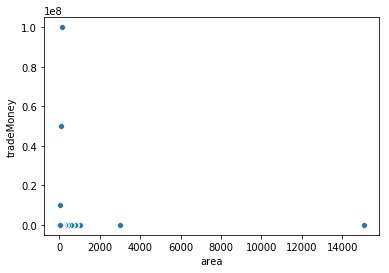

In [9]:
##--analysis "area" and "tradeMoney"
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

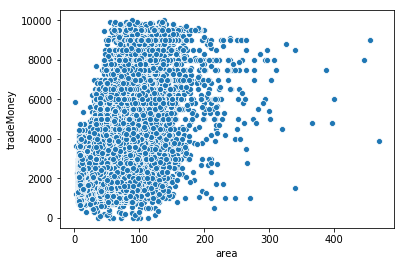

In [10]:
train_df=train_df[train_df["area"]<1000]
train_df = train_df[train_df["tradeMoney"]<10000]
test_df = test_df[test_df["area"]<1000]
sns.scatterplot(x="area",y="tradeMoney",data=train_df)
plt.show()

## -------------------The predicted variable - tradeMoney Skew & kurtosis analysis----------------

In [11]:
print("Skewness:",train_df['tradeMoney'].skew())

Skewness: 0.7381852274813457


In [12]:
print("Kurtness:",train_df["tradeMoney"].kurt())

Kurtness: 0.2919787079826217


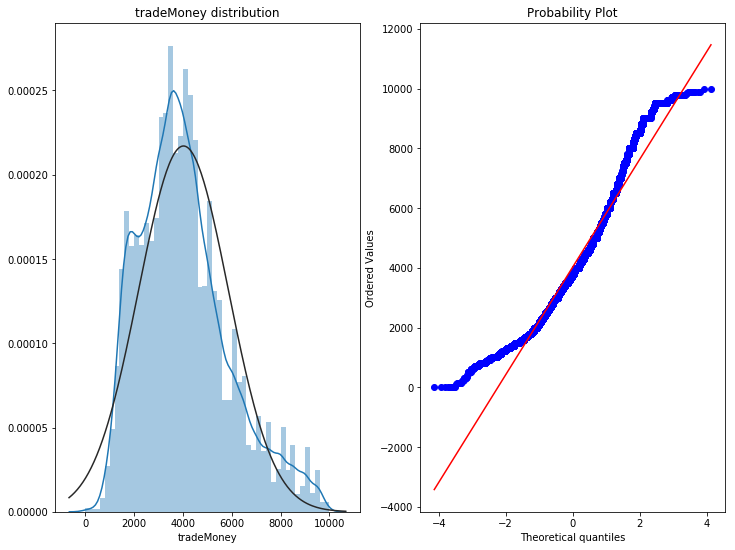

In [13]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
sns.distplot(train_df["tradeMoney"],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
stats.probplot(train_df["tradeMoney"],plot=plt)
plt.show()

## --------------------------------------------------Missing data------------------------------------------------

In [14]:
##--locating missing data
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
Total = data_feature.isnull().sum().sort_values(ascending=False)
Percent = Total/data_feature.isnull().count()
Missing_count = pd.concat((Total,Percent),axis=1,keys=['Total','Percent'],sort=False)
Missing_count[Missing_count.Total>0]

,Total,Percent
tradeMoney,2469,0.060
uv,17,0.000
pv,17,0.000


In [15]:
data_feature["rentType"].value_counts()

未知方式    30811
合租       5224
整租       5099
--          4
Name: rentType, dtype: int64

未知方式可以看成一个特征值

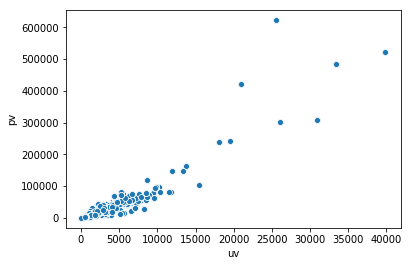

In [16]:
sns.scatterplot(x="uv",y="pv",data=data_feature)
plt.show()

这两个变量的相关性很强。

In [17]:
data_feature["uv"].fillna(data_feature["uv"].mean(),inplace=True)
data_feature["pv"].fillna(data_feature["pv"].mean(),inplace=True)
data_feature["pv"]=data_feature["pv"].astype(int)
data_feature["uv"]=data_feature["uv"].astype(int)

## -------------------------------------------Outlier Values------------------------------------------------

In [18]:
##--split the data set into numerical data and categorial--
categorial_feature=data_feature.select_dtypes(include=["object"]).columns
categorial_feature

Index(['buildYear', 'communityName', 'houseDecoration', 'houseFloor',
       'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime'],
      dtype='object')

In [19]:
numerical_feature=data_feature.select_dtypes(exclude=["object"]).columns
numerical_feature

Index(['area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum',
       'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice',
       'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv',
       'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum',
       'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea',
       'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea',
       'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney',
       'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice',
       'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv'],
      dtype='object')

In [20]:
## check categorial

data_feature["tradMonth"] = data_feature["tradeTime"].apply(lambda x:x.split("/")[1])
data_feature.drop("tradeTime",axis=1,inplace=True)

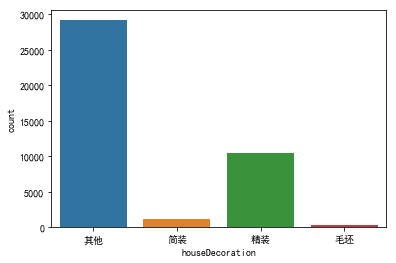

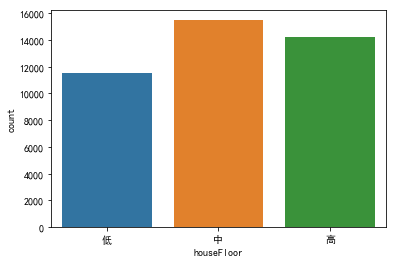

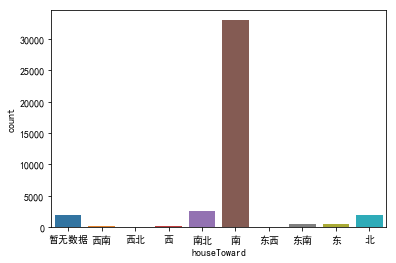

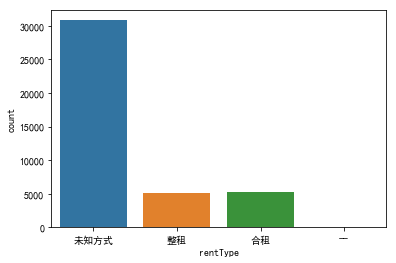

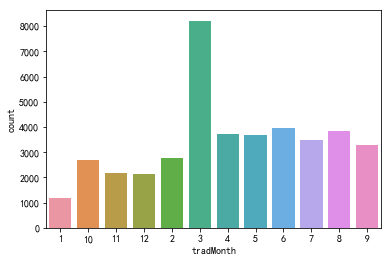

In [21]:
## plot
plt.rcParams['font.sans-serif']=['simhei']
columns_1=["houseDecoration","houseFloor","houseToward","rentType","tradMonth"];columns_2=["communityName","plate","region"]
for i in columns_1:
    sns.countplot(x=i,data=data_feature)
    plt.show()

In [22]:
data_feature["rentType"].value_counts()

未知方式    30811
合租       5224
整租       5099
--          4
Name: rentType, dtype: int64

出现了一个奇怪的值 "一"，直接删除

In [23]:
data_feature=data_feature[data_feature["rentType"]!="--"]

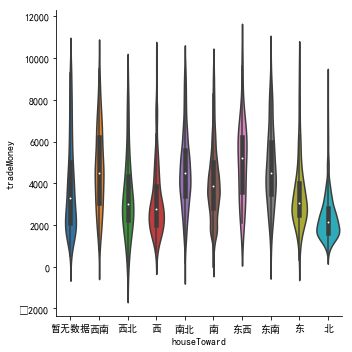

In [24]:
sns.catplot(x="houseToward",y="tradeMoney",data=data_feature,kind="violin")
plt.show()

"暂无数据"应该为"东北"，不过不改也没有影响

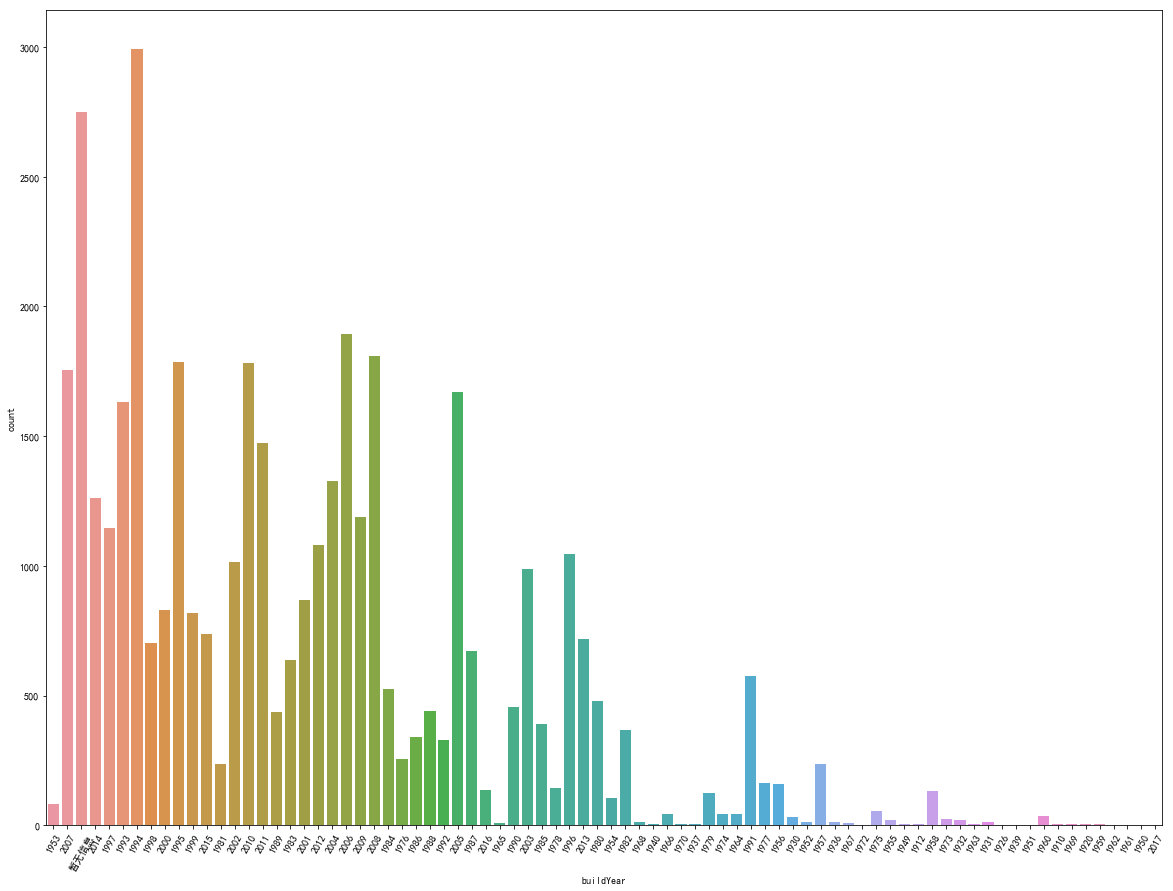

In [25]:
# "buildYear"
fig,ax=plt.subplots(figsize=(20,15))
sns.countplot(x="buildYear",data=data_feature,ax=ax)
plt.xticks(rotation=60)
plt.show()

有一列"暂无数据"需要填充

In [26]:
# The same communityName has same buildYear
inter=data_feature.groupby("communityName")
for name,group in inter["buildYear"]:
    print(name)
    print(group)
        

XQ00001
32316    2004
Name: buildYear, dtype: object
XQ00002
12131    2001
13042    2001
Name: buildYear, dtype: object
XQ00003
9213    1987
Name: buildYear, dtype: object
XQ00004
14307    1996
20038    1996
36285    1996
40945    1996
Name: buildYear, dtype: object
XQ00005
1076     1982
11461    1982
11708    1982
11962    1982
12495    1982
12775    1982
12782    1982
12870    1982
12877    1982
13031    1982
13189    1982
31909    1982
37304    1982
40950    1982
Name: buildYear, dtype: object
XQ00006
19783    1994
21326    1994
39948    1994
Name: buildYear, dtype: object
XQ00007
12950    1955
13191    1955
Name: buildYear, dtype: object
XQ00008
20081    1993
39511    1993
Name: buildYear, dtype: object
XQ00009
12783    1995
21008    1995
21011    1995
21322    1995
39522    1995
Name: buildYear, dtype: object
XQ00010
87       2002
10112    2002
19638    2002
Name: buildYear, dtype: object
XQ00011
11707    1994
12943    1994
13041    1994
16133    1994
16534    1994
19301    1994
2

Name: buildYear, dtype: object
XQ00197
504      2003
2436     2003
2649     2003
23222    2003
23484    2003
24512    2003
24816    2003
25230    2003
39620    2003
Name: buildYear, dtype: object
XQ00198
28478    2002
Name: buildYear, dtype: object
XQ00199
325      2015
367      2015
612      2015
625      2015
2195     2015
2225     2015
2666     2015
2873     2015
14973    2015
18739    2015
21533    2015
21598    2015
22212    2015
22470    2015
23543    2015
25085    2015
25938    2015
26587    2015
27190    2015
35181    2015
39399    2015
Name: buildYear, dtype: object
XQ00200
22220    1975
26560    1975
Name: buildYear, dtype: object
XQ00201
299      2004
408      2004
3509     2004
5192     2004
6121     2004
21877    2004
22821    2004
24499    2004
27933    2004
Name: buildYear, dtype: object
XQ00202
242      2010
300      2010
308      2010
321      2010
2210     2010
2583     2010
2846     2010
21563    2010
21577    2010
28565    2010
39210    2010
Name: buildYear, dtype: 

Name: buildYear, dtype: object
XQ00405
4969     1995
27559    1995
30569    1995
32009    1995
33074    1995
34155    1995
34157    1995
34171    1995
34537    1995
34886    1995
34891    1995
36047    1995
39011    1995
Name: buildYear, dtype: object
XQ00406
5068    2000
Name: buildYear, dtype: object
XQ00407
31289    2002
31307    2002
31646    2002
33420    2002
39102    2002
Name: buildYear, dtype: object
XQ00408
28938    1999
30936    1999
33785    1999
34143    1999
34856    1999
38540    1999
38681    1999
Name: buildYear, dtype: object
XQ00410
6072     2011
16334    2011
27549    2011
27566    2011
27793    2011
28945    2011
28951    2011
28975    2011
29274    2011
29286    2011
29288    2011
29299    2011
29921    2011
30929    2011
31623    2011
31912    2011
32007    2011
32011    2011
32385    2011
32387    2011
32724    2011
33426    2011
33431    2011
33784    2011
33801    2011
34142    2011
34149    2011
34169    2011
34176    2011
34179    2011
34508    2011
35165   

XQ00615
1809     暂无信息
31245    暂无信息
31790    暂无信息
32157    暂无信息
Name: buildYear, dtype: object
XQ00616
5257     1993
5917     1993
8048     1993
18718    1993
27665    1993
27687    1993
29068    1993
29405    1993
29703    1993
30039    1993
30711    1993
30717    1993
30745    1993
31410    1993
31412    1993
31419    1993
31425    1993
31454    1993
31780    1993
32133    1993
32170    1993
32859    1993
32885    1993
33227    1993
33231    1993
34305    1993
34637    1993
34660    1993
35388    1993
35416    1993
39841    1993
Name: buildYear, dtype: object
XQ00617
15827    2000
27034    2000
29407    2000
30019    2000
32881    2000
33568    2000
33944    2000
34641    2000
38264    2000
38430    2000
38659    2000
38663    2000
38840    2000
Name: buildYear, dtype: object
XQ00618
32168    2004
34288    2004
38998    2004
Name: buildYear, dtype: object
XQ00619
3085     2000
32514    2000
35041    2000
Name: buildYear, dtype: object
XQ00620
29092    1999
30716    1999
38408    1999

XQ00781
748      1995
27765    1995
Name: buildYear, dtype: object
XQ00782
6831     2002
9431     2002
32626    2002
Name: buildYear, dtype: object
XQ00783
8183     1996
18191    1996
24812    1996
27773    1996
28847    1996
29475    1996
29817    1996
29825    1996
30102    1996
30125    1996
30130    1996
31157    1996
31182    1996
31890    1996
31899    1996
32240    1996
33321    1996
34033    1996
34387    1996
34771    1996
40861    1996
Name: buildYear, dtype: object
XQ00784
29466    1997
32588    1997
34377    1997
36090    1997
40835    1997
Name: buildYear, dtype: object
XQ00785
29165    1995
30815    1995
31170    1995
32952    1995
32986    1995
33290    1995
33656    1995
33681    1995
34424    1995
35093    1995
40847    1995
Name: buildYear, dtype: object
XQ00786
31207    1994
31862    1994
31872    1994
35472    1994
35509    1994
36045    1994
38672    1994
Name: buildYear, dtype: object
XQ00787
3070     1994
3138     1994
4962     1994
27086    1994
27737    1994
27

Name: buildYear, dtype: object
XQ00950
6110     1997
27615    1997
27835    1997
29024    1997
30996    1997
31733    1997
32428    1997
32473    1997
33166    1997
33523    1997
33888    1997
34234    1997
34972    1997
35307    1997
35349    1997
40853    1997
Name: buildYear, dtype: object
XQ00951
32102    1997
32810    1997
33173    1997
33491    1997
35592    1997
39001    1997
Name: buildYear, dtype: object
XQ00952
28999    1998
29348    1998
29639    1998
29954    1998
30663    1998
31015    1998
32424    1998
32774    1998
32790    1998
32806    1998
33174    1998
33185    1998
33189    1998
34215    1998
40856    1998
Name: buildYear, dtype: object
XQ00953
29326    1993
29327    1993
29355    1993
29638    1993
31361    1993
31376    1993
32095    1993
32430    1993
32438    1993
33525    1993
36605    1993
38964    1993
Name: buildYear, dtype: object
XQ00954
5115     2000
31694    2000
35331    2000
Name: buildYear, dtype: object
XQ00955
30681    2005
30890    2005
33521    2

Name: buildYear, dtype: object
XQ01137
39099    2003
Name: buildYear, dtype: object
XQ01138
29632    1986
30614    1986
31683    1986
34199    1986
38778    1986
Name: buildYear, dtype: object
XQ01139
26972    1985
27575    1985
27580    1985
29315    1985
29950    1985
30973    1985
31669    1985
31682    1985
32417    1985
32764    1985
32768    1985
33139    1985
33476    1985
33846    1985
34919    1985
36582    1985
38972    1985
Name: buildYear, dtype: object
XQ01140
30981    1954
31335    1954
32415    1954
33840    1954
38454    1954
38792    1954
Name: buildYear, dtype: object
XQ01142
30615    1997
34552    1997
Name: buildYear, dtype: object
XQ01143
744      2003
2545     2003
5174     2003
6005     2003
27636    2003
29370    2003
29688    2003
29691    2003
30008    2003
30687    2003
30688    2003
31753    2003
31754    2003
32115    2003
33910    2003
34273    2003
35360    2003
38615    2003
39138    2003
Name: buildYear, dtype: object
XQ01144
30013    2005
39090    2005

Name: buildYear, dtype: object
XQ01308
3940     1977
5587     1977
5594     1977
5602     1977
7168     1977
7193     1977
8764     1977
9542     1977
9570     1977
9701     1977
9702     1977
10251    1977
10393    1977
10399    1977
10432    1977
10946    1977
10965    1977
11172    1977
11342    1977
11870    1977
15069    1977
36892    1977
37019    1977
37181    1977
37292    1977
40336    1977
Name: buildYear, dtype: object
XQ01309
5511     2005
10389    2005
Name: buildYear, dtype: object
XQ01310
14704    2004
15916    2004
19885    2004
40238    2004
Name: buildYear, dtype: object
XQ01311
39997    2014
Name: buildYear, dtype: object
XQ01312
3953     2005
10264    2005
Name: buildYear, dtype: object
XQ01313
125      2005
143      2005
161      2005
962      2005
1283     2005
1401     2005
1512     2005
1592     2005
1620     2005
1672     2005
1721     2005
1783     2005
1784     2005
1820     2005
1862     2005
1945     2005
1962     2005
1970     2005
2111     2005
2191     2

Name: buildYear, dtype: object
XQ01463
10418    暂无信息
11318    暂无信息
13411    暂无信息
14259    暂无信息
16447    暂无信息
16762    暂无信息
17180    暂无信息
17872    暂无信息
17920    暂无信息
18061    暂无信息
19711    暂无信息
36424    暂无信息
37131    暂无信息
37663    暂无信息
37776    暂无信息
37891    暂无信息
39286    暂无信息
Name: buildYear, dtype: object
XQ01464
3979     暂无信息
11634    暂无信息
15727    暂无信息
16221    暂无信息
19205    暂无信息
19842    暂无信息
21074    暂无信息
21077    暂无信息
21417    暂无信息
22700    暂无信息
24012    暂无信息
34074    暂无信息
39651    暂无信息
Name: buildYear, dtype: object
XQ01465
370      暂无信息
444      暂无信息
1085     暂无信息
1153     暂无信息
2143     暂无信息
3344     暂无信息
4002     暂无信息
5597     暂无信息
16193    暂无信息
16909    暂无信息
19240    暂无信息
21368    暂无信息
24000    暂无信息
24040    暂无信息
31584    暂无信息
31589    暂无信息
34070    暂无信息
35829    暂无信息
36496    暂无信息
40192    暂无信息
Name: buildYear, dtype: object
XQ01466
4036     2013
4057     2013
5529     2013
5567     2013
5611     2013
7725     2013
8284     2013
10953    2013
14280    2013
15596    2013
1605

XQ01633
3305     2014
14355    2014
17584    2014
18126    2014
19624    2014
20224    2014
21023    2014
21025    2014
21347    2014
21476    2014
22960    2014
23091    2014
24095    2014
35605    2014
39917    2014
Name: buildYear, dtype: object
XQ01634
49       暂无信息
499      暂无信息
1262     暂无信息
1392     暂无信息
1615     暂无信息
1976     暂无信息
2004     暂无信息
2057     暂无信息
2170     暂无信息
2182     暂无信息
2249     暂无信息
2264     暂无信息
2272     暂无信息
2315     暂无信息
2328     暂无信息
2334     暂无信息
2391     暂无信息
2556     暂无信息
3809     暂无信息
3839     暂无信息
3870     暂无信息
5535     暂无信息
6812     暂无信息
6856     暂无信息
7319     暂无信息
8059     暂无信息
9545     暂无信息
9706     暂无信息
10655    暂无信息
10693    暂无信息
10751    暂无信息
10898    暂无信息
10915    暂无信息
11122    暂无信息
11526    暂无信息
11527    暂无信息
11770    暂无信息
13346    暂无信息
13361    暂无信息
13372    暂无信息
14325    暂无信息
14334    暂无信息
14931    暂无信息
15670    暂无信息
15678    暂无信息
16120    暂无信息
16129    暂无信息
16529    暂无信息
16535    暂无信息
16826    暂无信息
16842    暂无信息
16844    暂无信息
16846    暂无信息
1

Name: buildYear, dtype: object
XQ01776
28291    1997
Name: buildYear, dtype: object
XQ01777
1346     1998
28071    1998
37976    1998
39402    1998
Name: buildYear, dtype: object
XQ01778
4557     2007
4694     2007
5698     2007
6034     2007
12682    2007
14964    2007
18194    2007
21558    2007
22213    2007
24268    2007
24710    2007
26464    2007
27144    2007
27158    2007
27409    2007
27784    2007
27844    2007
27973    2007
28197    2007
39250    2007
Name: buildYear, dtype: object
XQ01779
3428     2009
21879    2009
Name: buildYear, dtype: object
XQ01780
4544     2006
4568     2006
4626     2006
4662     2006
5713     2006
14494    2006
21744    2006
21932    2006
22307    2006
22316    2006
23228    2006
25033    2006
26716    2006
28009    2006
30252    2006
31579    2006
39302    2006
Name: buildYear, dtype: object
XQ01781
4558     1994
11977    1994
12959    1994
13201    1994
17743    1994
17744    1994
18766    1994
21757    1994
22200    1994
23327    1994
23378    1

XQ01941
4706     1994
4727     1994
5790     1994
6158     1994
21830    1994
22159    1994
22487    1994
22500    1994
23781    1994
24409    1994
24434    1994
24703    1994
25463    1994
25800    1994
26863    1994
28133    1994
28864    1994
28865    1994
28869    1994
28875    1994
30504    1994
38165    1994
39408    1994
Name: buildYear, dtype: object
XQ01942
18482    1994
19008    1994
19015    1994
21826    1994
23440    1994
25803    1994
27465    1994
39065    1994
Name: buildYear, dtype: object
XQ01943
1142    1993
Name: buildYear, dtype: object
XQ01944
26169    1993
Name: buildYear, dtype: object
XQ01945
19012    1994
21815    1994
25111    1994
25810    1994
26531    1994
28124    1994
28147    1994
28866    1994
30493    1994
32644    1994
36153    1994
39222    1994
Name: buildYear, dtype: object
XQ01946
28486    1996
35922    1996
37736    1996
Name: buildYear, dtype: object
XQ01947
4731     2010
18998    2010
22158    2010
24432    2010
25100    2010
26880    2010
268

Name: buildYear, dtype: object
XQ02122
2550     1997
4747     1997
26544    1997
26902    1997
39354    1997
Name: buildYear, dtype: object
XQ02123
18489    暂无信息
22510    暂无信息
22512    暂无信息
23455    暂无信息
23457    暂无信息
24778    暂无信息
25126    暂无信息
25477    暂无信息
26183    暂无信息
26187    暂无信息
27487    暂无信息
28157    暂无信息
28517    暂无信息
28889    暂无信息
28890    暂无信息
39108    暂无信息
Name: buildYear, dtype: object
XQ02124
25479    1996
28158    1996
28888    1996
Name: buildYear, dtype: object
XQ02125
1163     1995
19019    1995
19022    1995
21838    1995
21840    1995
21844    1995
22163    1995
22168    1995
22170    1995
22173    1995
22509    1995
23806    1995
24442    1995
24776    1995
24779    1995
25121    1995
25123    1995
25128    1995
25478    1995
25480    1995
25819    1995
25827    1995
25829    1995
26538    1995
26539    1995
26540    1995
26895    1995
26896    1995
26901    1995
27485    1995
27486    1995
27493    1995
28518    1995
28521    1995
28884    1995
28885    1995
2888

Name: buildYear, dtype: object
XQ02330
12353    1995
Name: buildYear, dtype: object
XQ02331
5       1997
6558    1997
7002    1997
Name: buildYear, dtype: object
XQ02332
8        1994
97       1994
3244     1994
3246     1994
3461     1994
3500     1994
3525     1994
5270     1994
5338     1994
6356     1994
6381     1994
6455     1994
6468     1994
6489     1994
6535     1994
6541     1994
6557     1994
6629     1994
6673     1994
6880     1994
6881     1994
6903     1994
6915     1994
6920     1994
6922     1994
6923     1994
6986     1994
7018     1994
7819     1994
7823     1994
7867     1994
7870     1994
7933     1994
7938     1994
7948     1994
7971     1994
8073     1994
8078     1994
8374     1994
8384     1994
8418     1994
8422     1994
8588     1994
8591     1994
8881     1994
8938     1994
9244     1994
9355     1994
9376     1994
9377     1994
9453     1994
9806     1994
9875     1994
9908     1994
9981     1994
9996     1994
9997     1994
10011    1994
12376    1994
1238

XQ02520
2479     1998
16575    1998
20198    1998
Name: buildYear, dtype: object
XQ02521
21460    1995
23974    1995
39926    1995
Name: buildYear, dtype: object
XQ02522
7466     1994
22749    1994
40593    1994
Name: buildYear, dtype: object
XQ02523
13       1999
16037    1999
Name: buildYear, dtype: object
XQ02524
20284    2013
Name: buildYear, dtype: object
XQ02525
23842    1997
35891    1997
40487    1997
Name: buildYear, dtype: object
XQ02526
8975     2000
39938    2000
Name: buildYear, dtype: object
XQ02527
15705    2006
16167    2006
16877    2006
17288    2006
18095    2006
19819    2006
20124    2006
20427    2006
21054    2006
39677    2006
Name: buildYear, dtype: object
XQ02528
2252     1998
14840    1998
20444    1998
Name: buildYear, dtype: object
XQ02529
9308     暂无信息
10028    暂无信息
14367    暂无信息
14374    暂无信息
14379    暂无信息
14844    暂无信息
15760    暂无信息
16163    暂无信息
16165    暂无信息
16174    暂无信息
16869    暂无信息
16873    暂无信息
16883    暂无信息
17285    暂无信息
17292    暂无信息
17294    暂无

XQ02698
851      1937
14847    1937
21452    1937
Name: buildYear, dtype: object
XQ02699
20446    1995
Name: buildYear, dtype: object
XQ02701
17309    1980
35906    1980
Name: buildYear, dtype: object
XQ02702
17688    1989
Name: buildYear, dtype: object
XQ02703
3703     1982
3717     1982
5408     1982
5412     1982
5414     1982
14852    1982
16643    1982
16646    1982
16651    1982
19521    1982
19595    1982
19599    1982
23994    1982
24072    1982
35594    1982
35791    1982
36366    1982
36666    1982
36667    1982
41041    1982
Name: buildYear, dtype: object
XQ02704
2317     1995
17682    1995
Name: buildYear, dtype: object
XQ02705
3720     1986
16576    1986
Name: buildYear, dtype: object
XQ02706
14854    1975
21048    1975
23061    1975
Name: buildYear, dtype: object
XQ02707
24066    1990
41043    1990
Name: buildYear, dtype: object
XQ02708
17378    1998
Name: buildYear, dtype: object
XQ02709
3339    1980
Name: buildYear, dtype: object
XQ02710
3699     1980
16656    1980
Name

9324     1985
21376    1985
Name: buildYear, dtype: object
XQ02942
16975    1912
37791    1912
39519    1912
Name: buildYear, dtype: object
XQ02943
14377    1987
16178    1987
40683    1987
Name: buildYear, dtype: object
XQ02944
3751     2007
21059    2007
Name: buildYear, dtype: object
XQ02945
21379    暂无信息
Name: buildYear, dtype: object
XQ02946
3754     2007
6439     2007
8167     2007
8997     2007
20120    2007
20540    2007
20766    2007
22673    2007
22998    2007
41026    2007
Name: buildYear, dtype: object
XQ02947
14850    1940
Name: buildYear, dtype: object
XQ02948
388      1990
10874    1990
Name: buildYear, dtype: object
XQ02949
7892    1981
Name: buildYear, dtype: object
XQ02950
22678    1999
40644    1999
Name: buildYear, dtype: object
XQ02951
11473    1983
35684    1983
Name: buildYear, dtype: object
XQ02952
19814    暂无信息
36515    暂无信息
Name: buildYear, dtype: object
XQ02953
19284    1987
20128    1987
36172    1987
36933    1987
40473    1987
Name: buildYear, dtype: objec

XQ03114
1327     2006
1915     2006
2201     2006
2822     2006
6052     2006
6325     2006
13195    2006
13196    2006
14130    2006
22390    2006
23706    2006
24227    2006
25507    2006
28283    2006
34065    2006
40021    2006
Name: buildYear, dtype: object
XQ03115
8584     2015
21539    2015
23246    2015
25148    2015
25637    2015
27163    2015
36567    2015
38150    2015
40105    2015
Name: buildYear, dtype: object
XQ03116
2639     2007
2793     2007
8575     2007
11712    2007
13654    2007
27215    2007
27901    2007
28289    2007
28751    2007
37417    2007
37450    2007
38231    2007
39392    2007
Name: buildYear, dtype: object
XQ03117
24674    1996
25658    1996
39369    1996
Name: buildYear, dtype: object
XQ03118
21961    2008
23198    2008
24468    2008
24847    2008
25233    2008
27179    2008
27276    2008
27986    2008
32297    2008
38323    2008
40104    2008
Name: buildYear, dtype: object
XQ03119
1148     2008
1160     2008
5694     2008
24817    2008
25998    2008

Name: buildYear, dtype: object
XQ03282
569      暂无信息
22352    暂无信息
23650    暂无信息
24287    暂无信息
25387    暂无信息
25604    暂无信息
25950    暂无信息
26369    暂无信息
26671    暂无信息
27953    暂无信息
30359    暂无信息
39583    暂无信息
Name: buildYear, dtype: object
XQ03284
567      2009
888      2009
1324     2009
2685     2009
2852     2009
4399     2009
4422     2009
4426     2009
4463     2009
4477     2009
18363    2009
18380    2009
18390    2009
18879    2009
21723    2009
21741    2009
23241    2009
23284    2009
23352    2009
25264    2009
25350    2009
25631    2009
26753    2009
27810    2009
28667    2009
28707    2009
28755    2009
30147    2009
30315    2009
32121    2009
39368    2009
Name: buildYear, dtype: object
XQ03285
2617     2007
4410     2007
4490     2007
5714     2007
5717     2007
6045     2007
13099    2007
16995    2007
18309    2007
18822    2007
18849    2007
18910    2007
21622    2007
23557    2007
24559    2007
25334    2007
25354    2007
25361    2007
25583    2007
25700    2007
2

Name: buildYear, dtype: object
XQ03488
11996    2002
12421    2002
13119    2002
18645    2002
36752    2002
36921    2002
40670    2002
Name: buildYear, dtype: object
XQ03489
8019     1999
17666    1999
21344    1999
Name: buildYear, dtype: object
XQ03490
10062    1982
10802    1982
11396    1982
11397    1982
11651    1982
12442    1982
12532    1982
12609    1982
12620    1982
15016    1982
15501    1982
16951    1982
32304    1982
40235    1982
Name: buildYear, dtype: object
XQ03491
286      2000
17986    2000
Name: buildYear, dtype: object
XQ03492
36189    1997
Name: buildYear, dtype: object
XQ03493
10303    2003
11402    2003
36792    2003
39836    2003
Name: buildYear, dtype: object
XQ03494
15490    1998
17074    1998
40257    1998
Name: buildYear, dtype: object
XQ03495
1016     1987
1301     1987
1426     1987
2219     1987
4141     1987
4144     1987
4151     1987
4160     1987
6012     1987
8826     1987
10793    1987
11385    1987
11953    1987
12327    1987
12439    1987
12

Name: buildYear, dtype: object
XQ03628
6016     1995
6828     1995
14342    1995
14815    1995
16853    1995
17546    1995
17981    1995
19468    1995
19794    1995
20092    1995
20094    1995
20098    1995
20404    1995
21345    1995
22639    1995
22955    1995
39282    1995
Name: buildYear, dtype: object
XQ03629
12625    2004
15540    2004
37248    2004
40094    2004
Name: buildYear, dtype: object
XQ03630
4179     1998
20847    1998
Name: buildYear, dtype: object
XQ03631
828      1993
17819    1993
18521    1993
Name: buildYear, dtype: object
XQ03632
15292    1997
18580    1997
40132    1997
Name: buildYear, dtype: object
XQ03633
12097    2001
17130    2001
37744    2001
39904    2001
Name: buildYear, dtype: object
XQ03634
19789    1998
Name: buildYear, dtype: object
XQ03635
4171     1994
4190     1994
5959     1994
6731     1994
8474     1994
11933    1994
12567    1994
12578    1994
12584    1994
12822    1994
12826    1994
13276    1994
13287    1994
13559    1994
13846    1994
13

Name: buildYear, dtype: object
XQ03794
24053    1997
40129    1997
Name: buildYear, dtype: object
XQ03795
17629    1998
20455    1998
32286    1998
Name: buildYear, dtype: object
XQ03796
5636     1989
13619    1989
Name: buildYear, dtype: object
XQ03797
21113    1995
22686    1995
Name: buildYear, dtype: object
XQ03798
11695    2000
36393    2000
Name: buildYear, dtype: object
XQ03799
19553    1979
20189    1979
40751    1979
Name: buildYear, dtype: object
XQ03800
9189     1991
14895    1991
16457    1991
17623    1991
20310    1991
20488    1991
22712    1991
40179    1991
Name: buildYear, dtype: object
XQ03801
16197    暂无信息
22717    暂无信息
Name: buildYear, dtype: object
XQ03802
17333    1989
40128    1989
Name: buildYear, dtype: object
XQ03803
14407    1982
16625    1982
19879    1982
Name: buildYear, dtype: object
XQ03804
19224    1992
40963    1992
Name: buildYear, dtype: object
XQ03805
21091    1988
Name: buildYear, dtype: object
XQ03806
959      1986
967      1986
4261     1986
426

XQ04018
40990    2002
Name: buildYear, dtype: object
XQ04019
12544    1958
13513    1958
14193    1958
15024    1958
15123    1958
15253    1958
15255    1958
15355    1958
15363    1958
15503    1958
15863    1958
15976    1958
16359    1958
16362    1958
17089    1958
17790    1958
20832    1958
36369    1958
37534    1958
39919    1958
Name: buildYear, dtype: object
XQ04021
1985     1994
14537    1994
17793    1994
Name: buildYear, dtype: object
XQ04022
39957    2011
Name: buildYear, dtype: object
XQ04023
9446    1998
Name: buildYear, dtype: object
XQ04024
39893    2001
Name: buildYear, dtype: object
XQ04025
5956     2009
14181    2009
14540    2009
15973    2009
16363    2009
17087    2009
17671    2009
19883    2009
30874    2009
40993    2009
Name: buildYear, dtype: object
XQ04026
16669    1983
21288    1983
39488    1983
Name: buildYear, dtype: object
XQ04027
374    暂无信息
Name: buildYear, dtype: object
XQ04028
2273    1980
Name: buildYear, dtype: object
XQ04029
18091    1980
Name

结果发现，缺失值是一个小区一个小区的缺，所以想做的话，只能把一个小区的"buildYear"设为一样。先不处理~

In [27]:
data_feature['buildYear'] = np.where(data_feature['buildYear'] == '暂无信息', 2019, data_feature['buildYear'])
data_feature['buildYear'] = data_feature['buildYear'].astype(int)
data_feature['buildYear'] = 2019-data_feature['buildYear']

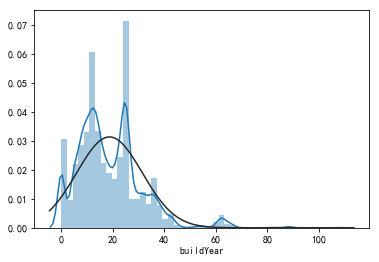

In [28]:
#transfrom buildYear to numerical feature
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [29]:
print("buildYear before transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear before transform:
1.322479825236198
3.662761013623981


In [30]:
lm=0.15
data_feature["buildYear"]=boxcox1p(data_feature["buildYear"],lm)

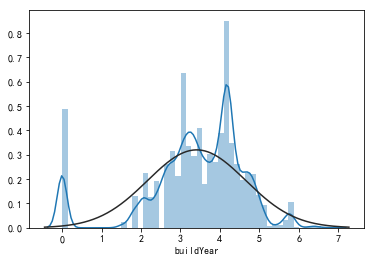

In [31]:
sns.distplot(data_feature["buildYear"],fit=norm)
plt.show()

In [32]:
print("buildYear after transform:")
print(data_feature["buildYear"].skew())
print(data_feature["buildYear"].kurt())

buildYear after transform:
-1.086103753897014
1.5083121163572897


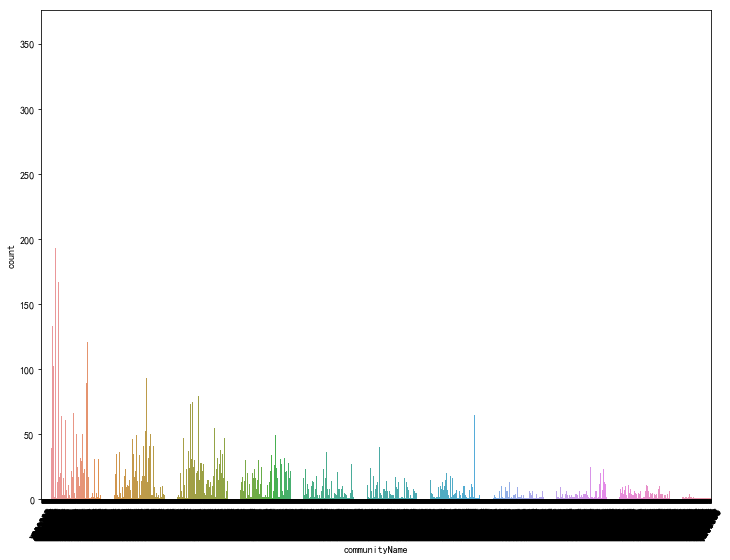

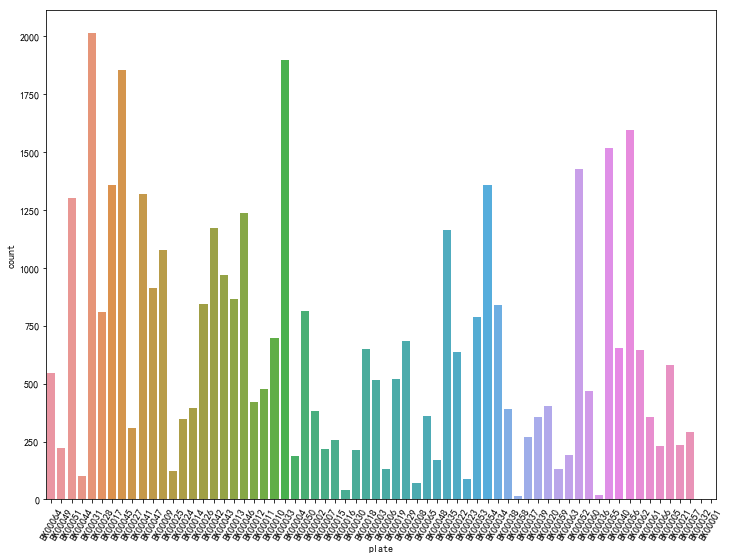

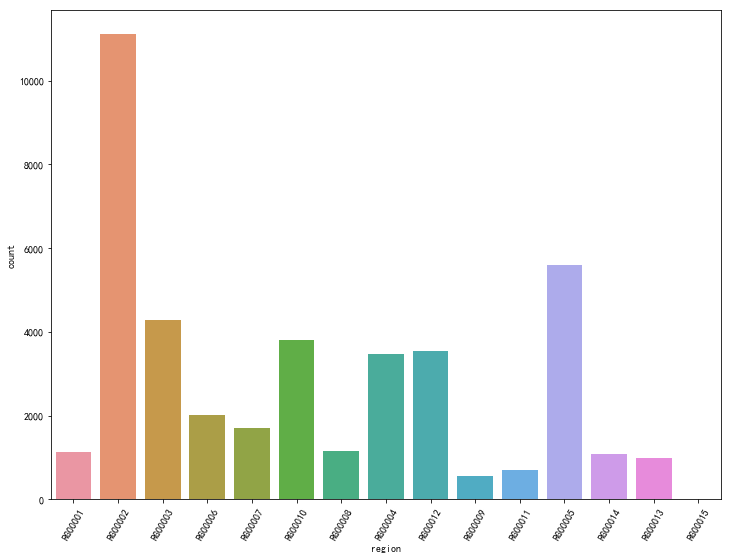

In [33]:
for j in columns_2:
    fig,ax=plt.subplots(figsize=(12,9))
    sns.countplot(x=j,data=data_feature,ax=ax)
    plt.xticks(rotation=60)
    plt.show()

从图形上看，communityName特征太多，区分度不高，后期看一下怎么处理,这里先直接删掉

In [34]:
data_feature.drop("communityName",axis=1,inplace=True)

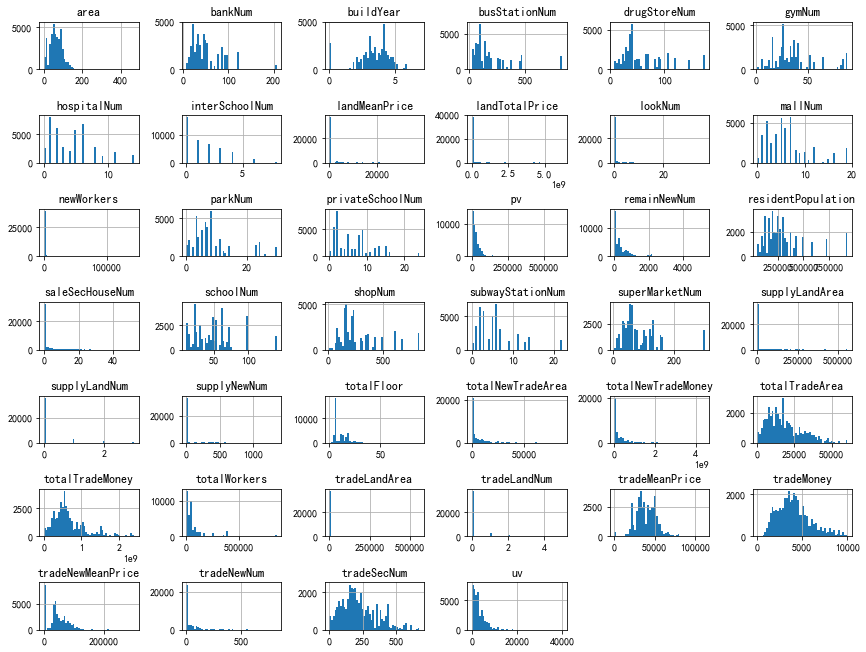

In [35]:
## check numerical feature

data_feature.hist(bins=50,figsize=(12,9))
plt.tight_layout(pad=0.5)
plt.show()

In [36]:
data_feature.head(20)

,area,bankNum,buildYear,busStationNum,drugStoreNum,gymNum,hospitalNum,houseDecoration,houseFloor,houseToward,houseType,interSchoolNum,landMeanPrice,landTotalPrice,lookNum,mallNum,newWorkers,parkNum,plate,privateSchoolNum,pv,region,remainNewNum,rentType,residentPopulation,saleSecHouseNum,schoolNum,shopNum,subwayStationNum,superMarketNum,supplyLandArea,supplyLandNum,supplyNewNum,totalFloor,totalNewTradeArea,totalNewTradeMoney,totalTradeArea,totalTradeMoney,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,uv,tradMonth
0,68.060,16,5.860,36,12,15,1,其他,低,暂无数据,2室1厅1卫,0,0.000,0,0,3,614,5,BK00064,1,1124,RG00001,264,未知方式,111546,0,28,76,7,22,0.000,0,0,16,7755,810967373,7411.980,355584000,28248,0.000,0,47974.226,2000.000,104573.485,25,111,284,11
1,125.550,16,3.128,184,27,5,1,简装,中,暂无数据,3室2厅2卫,0,0.000,0,1,4,148,6,BK00049,0,701,RG00002,4,未知方式,157552,0,26,163,2,51,0.000,0,0,14,286,9668955,122.830,5000000,14823,0.000,0,40706.668,2000.000,33807.535,2,2,22,12
2,57.000,47,0.000,364,83,30,8,精装,中,暂无数据,1室1厅1卫,2,3080.033,332760000,9,1,1665,3,BK00051,1,888,RG00002,730,未知方式,253337,0,60,358,3,131,108037.800,1,0,17,6418,196307819,22809.700,468272888,8750,108037.800,1,20529.551,1600.000,30587.071,58,260,279,12
3,129.000,10,0.000,141,21,5,0,毛坯,低,暂无数据,3室2厅3卫,0,0.000,0,0,2,117,5,BK00044,0,2038,RG00003,851,未知方式,125309,1,15,100,0,34,0.000,0,216,2,5608,286722058,4463.620,108851470,800,0.000,0,24386.366,2900.000,51127.328,34,38,480,11
4,78.940,47,2.056,364,83,30,8,其他,中,暂无数据,2室2厅1卫,2,0.000,0,0,1,1467,3,BK00051,1,1586,RG00002,788,未知方式,253337,6,60,358,3,131,0.000,0,0,18,5062,150297094,18080.570,363542000,8750,0.000,0,20106.778,1000.000,29691.247,46,216,469,11
5,76.000,86,4.003,461,106,36,6,其他,中,暂无数据,2室1厅1卫,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,5,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1800.000,35584.250,389,481,2942,3
6,120.550,86,3.128,461,106,36,6,其他,中,暂无数据,3室2厅1卫,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,6,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,1450.000,35584.250,389,481,2942,3
7,83.000,86,4.263,461,106,36,6,其他,中,暂无数据,3室1厅1卫,4,0.000,0,0,12,0,7,BK00031,5,34441,RG00006,946,未知方式,371900,0,71,598,6,119,0.000,0,422,5,12627,426759254,29637.500,624380000,28546,0.000,0,21067.229,1700.000,33797.359,119,331,3035,4
8,89.000,86,4.201,461,106,36,6,其他,中,暂无数据,2室1厅1卫,4,0.000,0,0,12,0,7,BK00031,5,34441,RG00006,946,未知方式,371900,0,71,598,6,119,0.000,0,422,6,12627,426759254,29637.500,624380000,28546,0.000,0,21067.229,1500.000,33797.359,119,331,3035,4
9,80.640,86,3.933,461,106,36,6,其他,中,暂无数据,2室2厅1卫,4,0.000,0,0,12,0,7,BK00031,5,40787,RG00006,643,未知方式,371900,0,71,598,6,119,0.000,0,328,6,41256,1468063801,42188.640,960190000,28546,0.000,0,22759.444,2000.000,35584.250,389,481,2942,3
